# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import os
from sklearn.feature_selection import chi2
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

c:\Users\veron\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Data

In [3]:
train_general = pd.read_csv('train_building_general_information.csv')
train_structure = pd.read_csv('train_building_superstructure_information.csv')
train_usability = pd.read_csv('train_building_usability_information.csv')

train_general.head()

,id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,count_families,damage_grade
0,0,2,23,336,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Private,1.0,5
1,1,1,15,263,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Private,1.0,5
2,2,2,19,315,17,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Private,1.0,5
3,3,3,45,450,21,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Private,1.0,5
4,4,1,20,315,9,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,Not applicable,Not attached,Rectangular,Private,1.0,5


In [4]:
train_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432202 entries, 0 to 432201
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      432202 non-null  int64  
 1   count_floors_pre_eq     432202 non-null  int64  
 2   age_building            432202 non-null  int64  
 3   plinth_area_sq_ft       432202 non-null  int64  
 4   height_ft_pre_eq        432202 non-null  int64  
 5   land_surface_condition  432202 non-null  object 
 6   foundation_type         432202 non-null  object 
 7   roof_type               432202 non-null  object 
 8   ground_floor_type       432202 non-null  object 
 9   other_floor_type        432202 non-null  object 
 10  position                432202 non-null  object 
 11  plan_configuration      432202 non-null  object 
 12  legal_ownership_status  432202 non-null  object 
 13  count_families          432201 non-null  float64
 14  damage_grade        

# Data Understanding
# 1. Target Feature : Demage Grade 
# 2. Categorical 
* foundation_type 
* roof_type
* ground_floor_type 
* other_floor_type
* position
* plan_configuration
* legal_ownership_status
* has_superstructure_adobe_mud            
* has_superstructure_mud_mortar_stone     
* has_superstructure_stone_flag          
* has_superstructure_cement_mortar_stone  
* has_superstructure_mud_mortar_brick    
* has_superstructure_cement_mortar_brick  
* has_superstructure_timber     
* has_superstructure_bamboo  
* has_superstructure_rc_non_engineered    
* has_superstructure_rc_engineered        
* has_superstructure_other    
* has_secondary_use       
* has_secondary_use_agriculture            
* has_secondary_use_hotel                  
* has_secondary_use_rental                 
* has_secondary_use_institution             
* has_secondary_use_school                  
* has_secondary_use_industry               
* has_secondary_use_health_post             
* has_secondary_use_gov_office            
* has_secondary_use_use_police            
* has_secondary_use_other
# 3. Numerical 
* count_floors_pre_eq, a
* ge_building
* plinth_area_sq_ft 
* height_ft_pre_eq 
* land_surface_condition 
* count_families


In [5]:
train_general.isnull().sum()

id                        0
count_floors_pre_eq       0
age_building              0
plinth_area_sq_ft         0
height_ft_pre_eq          0
land_surface_condition    0
foundation_type           0
roof_type                 0
ground_floor_type         0
other_floor_type          0
position                  0
plan_configuration        0
legal_ownership_status    0
count_families            1
damage_grade              0
dtype: int64

In [6]:
train_general['count_families'].fillna(0, inplace=True)

In [7]:
train_structure.isnull().sum()

id                                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
dtype: int64

In [8]:
train_usability.isnull().sum()

id                               0
has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
dtype: int64

In [9]:
output2 = pd.merge(train_general, train_structure , 
                   on='id',  
                   how='left') 

In [10]:
output = pd.merge(output2, train_usability ,
                    on='id',
                    how='left')

In [11]:
# Move Middle column to the Begining
temp_cols=output.columns.tolist()
index=output.columns.get_loc("damage_grade")
new_cols =  temp_cols[0:index] + temp_cols[index+1:] + temp_cols[index:index+1]
train_gabung = output[new_cols]

In [12]:
train_gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432202 entries, 0 to 432201
Data columns (total 37 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      432202 non-null  int64  
 1   count_floors_pre_eq                     432202 non-null  int64  
 2   age_building                            432202 non-null  int64  
 3   plinth_area_sq_ft                       432202 non-null  int64  
 4   height_ft_pre_eq                        432202 non-null  int64  
 5   land_surface_condition                  432202 non-null  object 
 6   foundation_type                         432202 non-null  object 
 7   roof_type                               432202 non-null  object 
 8   ground_floor_type                       432202 non-null  object 
 9   other_floor_type                        432202 non-null  object 
 10  position                                4322

Test Cleaning

In [14]:
test_general = pd.read_csv('test_building_general_information.csv')
test_structure = pd.read_csv('test_building_superstructure_information.csv')
test_usability = pd.read_csv('test_building_usability_information.csv')

In [15]:
test_general.isnull().sum()

id                        0
count_floors_pre_eq       0
age_building              0
plinth_area_sq_ft         0
height_ft_pre_eq          0
land_surface_condition    0
foundation_type           0
roof_type                 0
ground_floor_type         0
other_floor_type          0
position                  0
plan_configuration        0
legal_ownership_status    0
count_families            0
dtype: int64

In [16]:
test_structure.isnull().sum()

id                                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
dtype: int64

In [17]:
test_usability.isnull().sum()

id                               0
has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
dtype: int64

In [18]:
test_out = pd.merge(test_general, test_structure ,
                    on='id',
                    how='left')

In [19]:
test_gabung = pd.merge(test_out, test_usability ,
                    on='id',
                    how='left')

In [20]:
test_gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329892 entries, 0 to 329891
Data columns (total 36 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      329892 non-null  int64  
 1   count_floors_pre_eq                     329892 non-null  int64  
 2   age_building                            329892 non-null  int64  
 3   plinth_area_sq_ft                       329892 non-null  int64  
 4   height_ft_pre_eq                        329892 non-null  int64  
 5   land_surface_condition                  329892 non-null  object 
 6   foundation_type                         329892 non-null  object 
 7   roof_type                               329892 non-null  object 
 8   ground_floor_type                       329892 non-null  object 
 9   other_floor_type                        329892 non-null  object 
 10  position                                3298

### Feature Engineering

In [21]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_fe = train_gabung.copy()  # Change df to df_train
feature_mms = train_gabung.select_dtypes(include="number").drop(["id", "damage_grade"], axis=1).columns.tolist()
df_fe[feature_mms] = mms.fit_transform(train_gabung[feature_mms])

In [22]:
# Encoding
def encode_label(df_fe):
    if df_fe.dtype == "object":
        df_fe = LabelEncoder().fit_transform(df_fe)
    return df_fe

In [23]:
df_fe = df_fe.apply(lambda x : encode_label(x))
df_fe.head()

,id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,0.125,0.023023,0.053955,0.129032,0,2,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,1,0.000,0.015015,0.039148,0.010753,0,2,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2,0.125,0.019019,0.049696,0.118280,0,2,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,3,0.250,0.045045,0.077079,0.161290,0,2,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,4,0.000,0.020020,0.049696,0.032258,0,2,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [24]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432202 entries, 0 to 432201
Data columns (total 37 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      432202 non-null  int64  
 1   count_floors_pre_eq                     432202 non-null  float64
 2   age_building                            432202 non-null  float64
 3   plinth_area_sq_ft                       432202 non-null  float64
 4   height_ft_pre_eq                        432202 non-null  float64
 5   land_surface_condition                  432202 non-null  int32  
 6   foundation_type                         432202 non-null  int32  
 7   roof_type                               432202 non-null  int32  
 8   ground_floor_type                       432202 non-null  int32  
 9   other_floor_type                        432202 non-null  int32  
 10  position                                4322

### Feature Scaling

In [25]:
categorical_cols = ['foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 
                    'position', 'plan_configuration', 'legal_ownership_status', 
                    'damage_grade','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
                    'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
                    'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
                    'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 
                    'has_superstructure_rc_engineered', 'has_superstructure_other', 'has_secondary_use', 
                    'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental',
                    'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry',
                    'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police',
                    'has_secondary_use_other']
categorical_cols1 = ['foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 
                    'position', 'plan_configuration', 'legal_ownership_status', 
                    'damage_grade','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
                    'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
                    'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
                    'has_superstructure_timber']
categorical_cols2 = ['has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 
                    'has_superstructure_rc_engineered', 'has_superstructure_other', 'has_secondary_use', 
                    'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental',
                    'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry',
                    'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police',
                    'has_secondary_use_other']
numerical_cols = ['count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'land_surface_condition']

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Combine categorical and numerical columns
X = df_fe[categorical_cols + numerical_cols]
y = df_fe['damage_grade']

# Feature selection using SelectKBest and f_classif for categorical and numerical data
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)

# Get the scores and p-values
scores = fs.scores_
p_values = fs.pvalues_

# Print the scores and p-values for each feature
for i in range(len(X.columns)):
    print(f'Feature {X.columns[i]} Score: {scores[i]}, P-Value: {p_values[i]}')

Feature foundation_type Score: 806.2395536913622, P-Value: 0.0
Feature roof_type Score: 7208.9902404805625, P-Value: 0.0
Feature ground_floor_type Score: 19737.783237641113, P-Value: 0.0
Feature other_floor_type Score: 9662.534583583847, P-Value: 0.0
Feature position Score: 141.47880453748394, P-Value: 4.427335138772089e-121
Feature plan_configuration Score: 643.205795316007, P-Value: 0.0
Feature legal_ownership_status Score: 1122.3233209196048, P-Value: 0.0
Feature damage_grade Score: inf, P-Value: 0.0
Feature has_superstructure_adobe_mud Score: 427.4169190008129, P-Value: 0.0
Feature has_superstructure_mud_mortar_stone Score: 38842.65403976902, P-Value: 0.0
Feature has_superstructure_stone_flag Score: 533.5489302806163, P-Value: 0.0
Feature has_superstructure_cement_mortar_stone Score: 487.45841273421837, P-Value: 0.0
Feature has_superstructure_mud_mortar_brick Score: 513.7922326326961, P-Value: 0.0
Feature has_superstructure_cement_mortar_brick Score: 17752.449899787258, P-Value: 0.

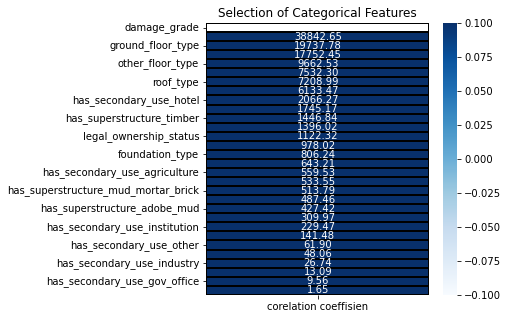

In [27]:
features = df_fe[categorical_cols]
target = df_fe['damage_grade']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data=fit.scores_,index = list(features.columns),columns=['corelation coeffisien'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'corelation coeffisien'),annot = True,cmap = "Blues",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

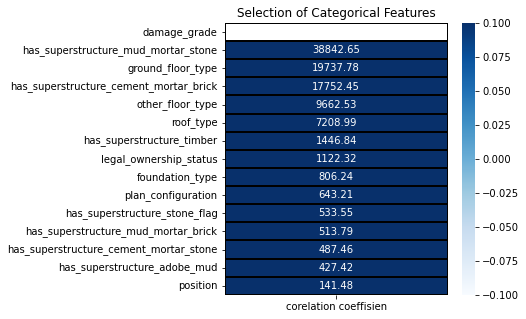

In [28]:
features = df_fe[categorical_cols1]
target = df_fe['damage_grade']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data=fit.scores_,index = list(features.columns),columns=['corelation coeffisien'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'corelation coeffisien'),annot = True,cmap = "Blues",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

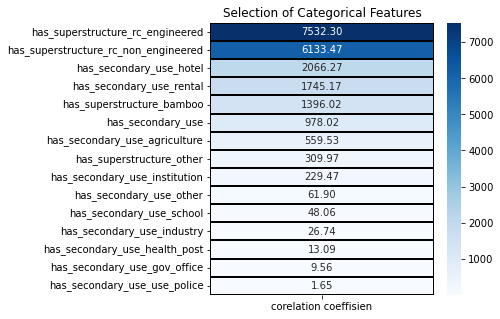

In [29]:
features = df_fe[categorical_cols2]
target = df_fe['damage_grade']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data=fit.scores_,index = list(features.columns),columns=['corelation coeffisien'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'corelation coeffisien'),annot = True,cmap = "Blues",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

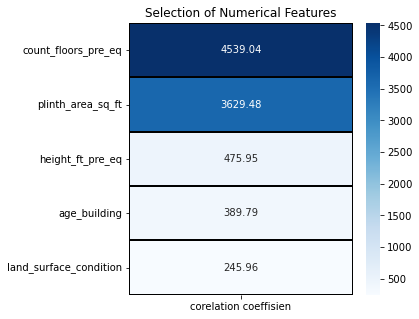

In [30]:
features = df_fe[numerical_cols]
target = df_fe['damage_grade']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data=fit.scores_,index = list(features.columns),columns=['corelation coeffisien'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'corelation coeffisien'),annot = True,cmap = "Blues",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [31]:
df_model= df_fe.copy()
df_model = df_model.drop(['has_secondary_use_gov_office', 'has_secondary_use_industry', 'has_secondary_use_other', 'has_secondary_use_institution','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_brick','has_secondary_use_agriculture' ], axis=1)

In [32]:
df_model = df_model.drop('id', axis=1)

In [33]:
from sklearn.model_selection import train_test_split
X = df_model.drop("damage_grade", axis = 1)
y = df_model["damage_grade"].values
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, 
                                                    random_state = random_seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((345761, 28), (86441, 28), (345761,), (86441,))

# MODELING

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=random_seed)

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Laporan klasifikasi
print(classification_report(y_test, y_pred))


Accuracy: 0.37
              precision    recall  f1-score   support

           1       0.44      0.44      0.44      9066
           2       0.21      0.23      0.22      9873
           3       0.24      0.25      0.24     15474
           4       0.33      0.32      0.32     20893
           5       0.51      0.50      0.51     31135

    accuracy                           0.37     86441
   macro avg       0.35      0.35      0.35     86441
weighted avg       0.38      0.37      0.37     86441



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membuat model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=random_seed
)

# Melatih model pada data pelatihan
rf_model.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi performa model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

# Laporan klasifikasi
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.43
              precision    recall  f1-score   support

           1       0.51      0.56      0.54      9066
           2       0.27      0.19      0.22      9873
           3       0.28      0.23      0.25     15474
           4       0.35      0.33      0.34     20893
           5       0.52      0.63      0.57     31135

    accuracy                           0.43     86441
   macro avg       0.39      0.39      0.38     86441
weighted avg       0.41      0.43      0.41     86441



In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Membuat model Logistic Regression
logreg_model = LogisticRegression(random_state=random_seed)

# Melatih model pada data pelatihan
logreg_model.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred_logreg = logreg_model.predict(X_test)

# Evaluasi performa model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy_logreg:.2f}')

# Laporan klasifikasi
print(classification_report(y_test, y_pred_logreg))


Accuracy: 0.43
              precision    recall  f1-score   support

           1       0.48      0.62      0.54      9066
           2       0.25      0.03      0.05      9873
           3       0.26      0.06      0.09     15474
           4       0.31      0.06      0.10     20893
           5       0.44      0.93      0.60     31135

    accuracy                           0.43     86441
   macro avg       0.35      0.34      0.28     86441
weighted avg       0.36      0.43      0.32     86441

